##**Import Dependences**

In [ ]:
#data manipulation and visualisation libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#import interactive library
from ipywidgets import interact

#balancing the target variable
from imblearn.over_sampling import RandomOverSampler

#variable scaling libraries
from sklearn.preprocessing import StandardScaler

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#feature selection libraries
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#import hyperparameter tuning library
from sklearn.model_selection import GridSearchCV

#other libraries
import math
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Water_Potability_Project /waterQuality1.csv')

## **EXPLANATORY DATA ANALYSIS (EDA)**

We perform Exploratory Data Analysis or EDA to:
1.   Understand dataset variables
2.   Clean dataset
3.   Plot dataset variables
4.   Analyze relationships between variables   

### **2.1, 2.2 Understanding dataset variables and cleaning it**

In [ ]:
data.head(5)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
# Menyimpan DataFrame ke dalam file Excel
data.to_excel("data_head.xlsx", index=False)

In [ ]:
data.shape

(7999, 21)

In [ ]:
#datatypes of all present attributes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
#drop missing values
data['ammonia'].value_counts()['#NUM!']
data = data[data['ammonia'].str.contains('#NUM!') == False]

In [ ]:
#convert both columns to numeric data type
data['ammonia'] = pd.to_numeric(data['ammonia'])
data['is_safe'] = pd.to_numeric(data['is_safe'])

In [ ]:
#statistic metrics for continuous variables without scientific notation
desc= data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

In [ ]:
# Menyimpan DataFrame ke dalam file Excel
desc.to_excel("data_desc.xlsx", index=False)

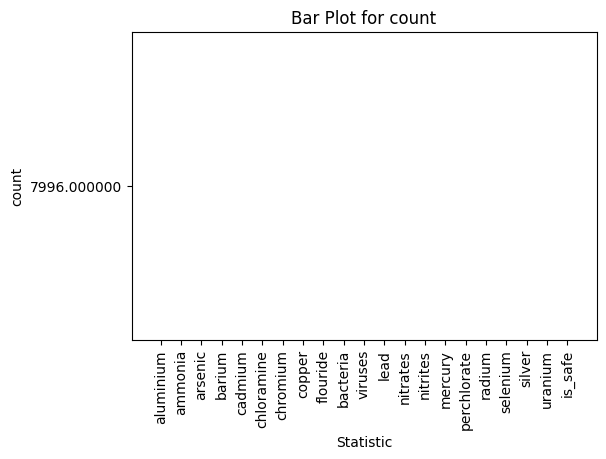

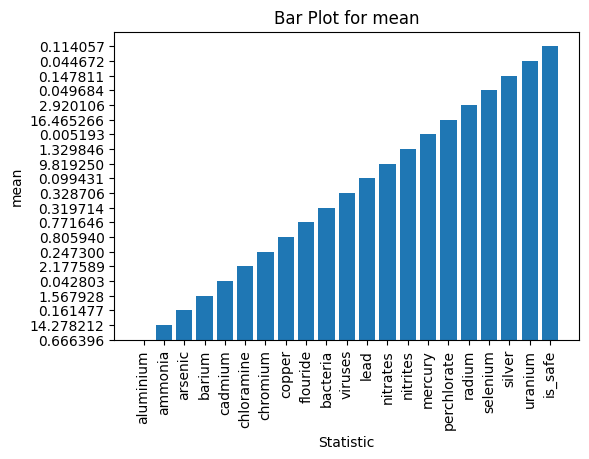

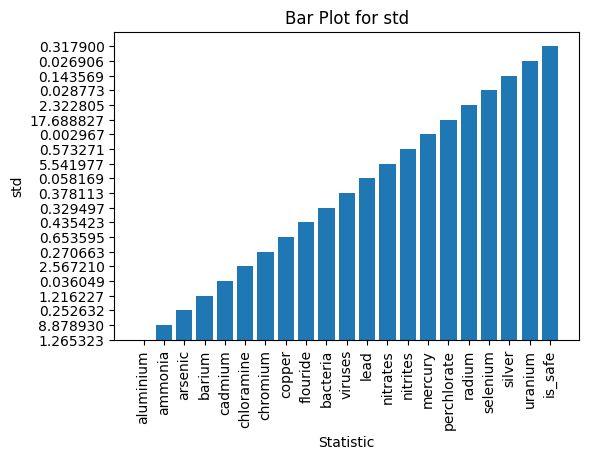

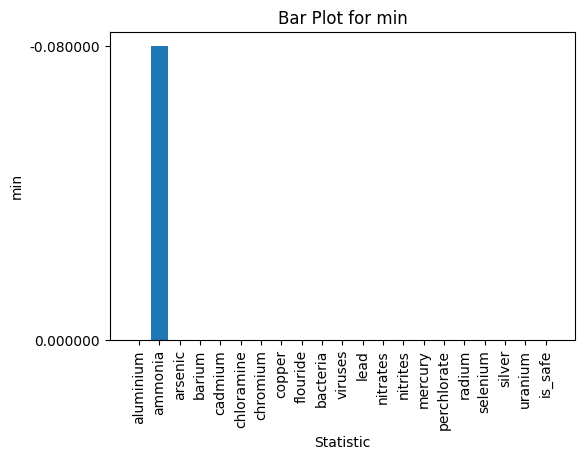

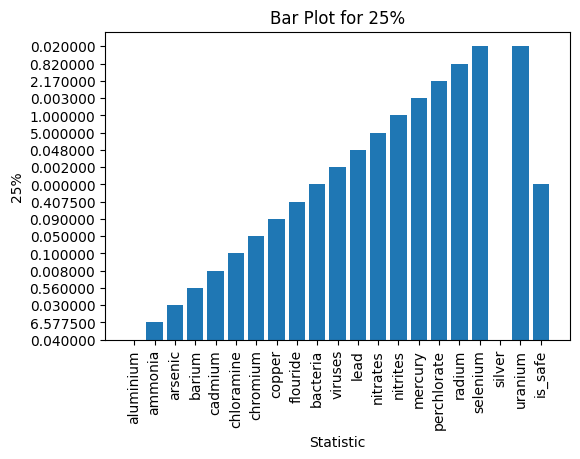

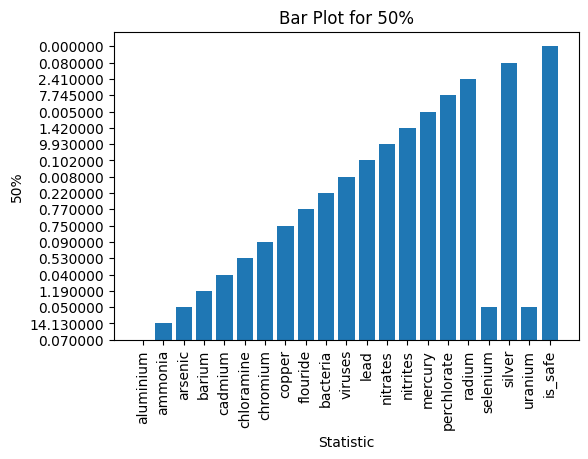

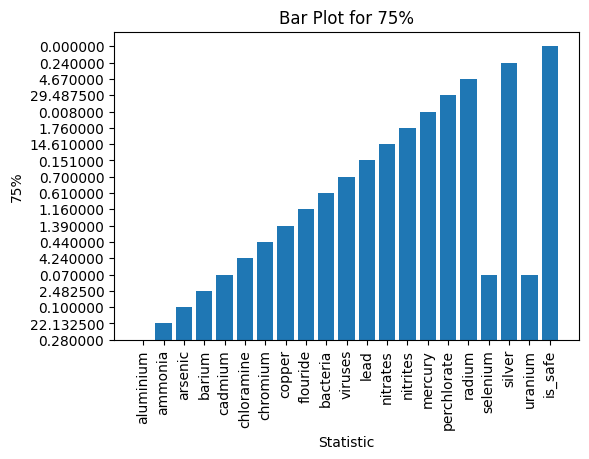

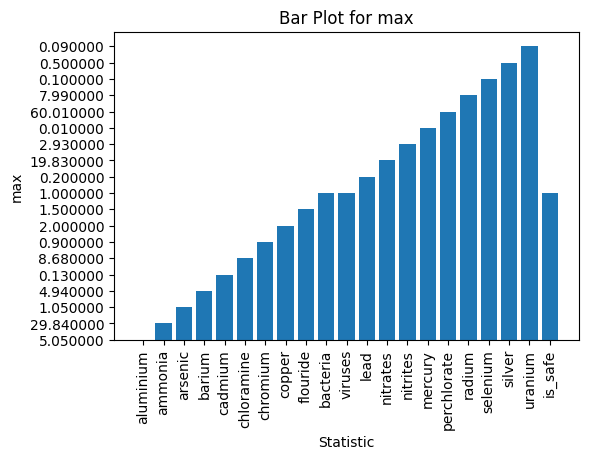

In [ ]:
import matplotlib.pyplot as plt

# Loop melalui setiap kolom dalam hasil describe
for column in desc.columns:
    # Buat bar plot untuk setiap kolom
    plt.figure(figsize=(6, 4))
    plt.bar(desc.index, desc[column])
    plt.title(f'Bar Plot for {column}')
    plt.xlabel('Statistic')
    plt.ylabel(column)
    plt.xticks(rotation=90)
    plt.show()

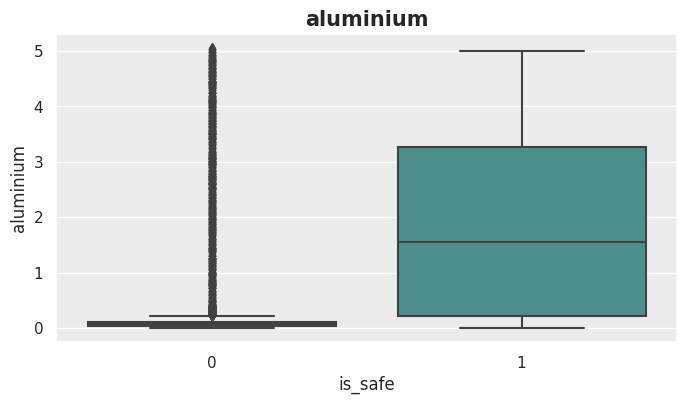

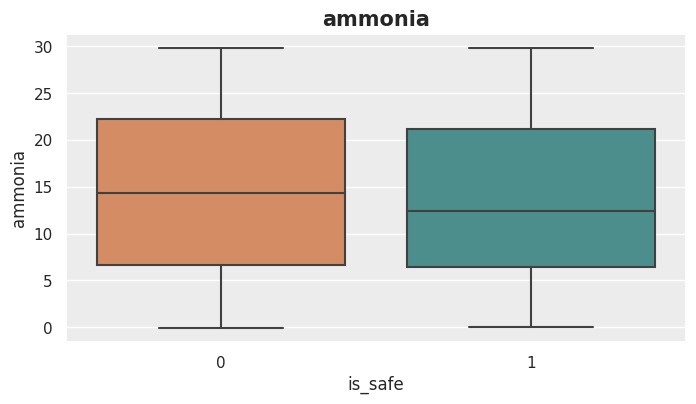

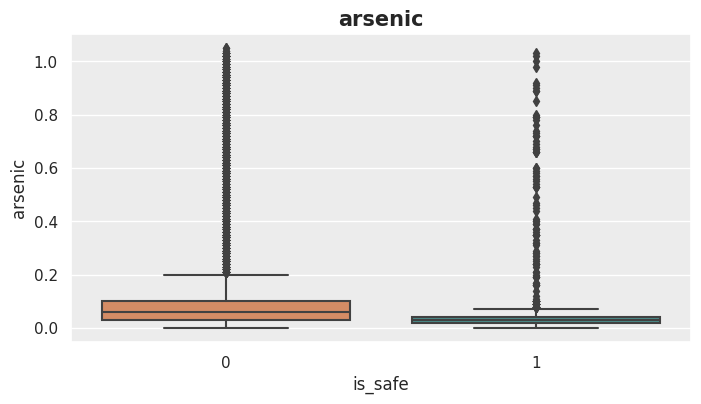

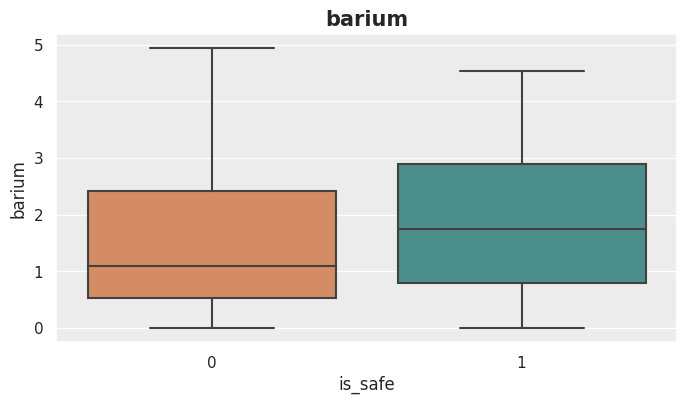

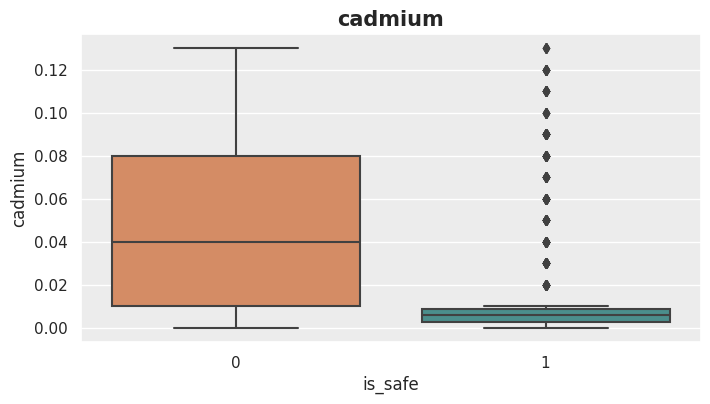

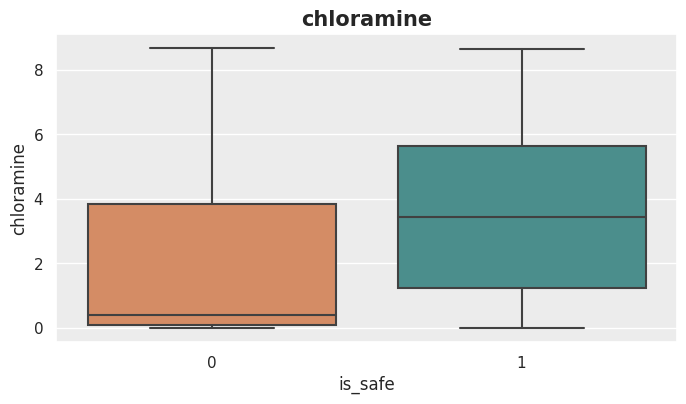

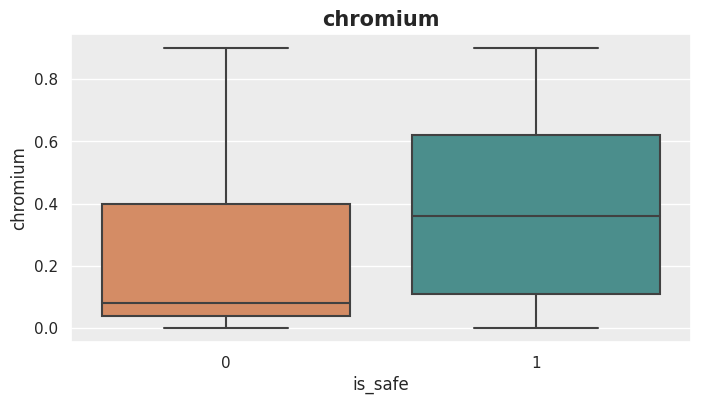

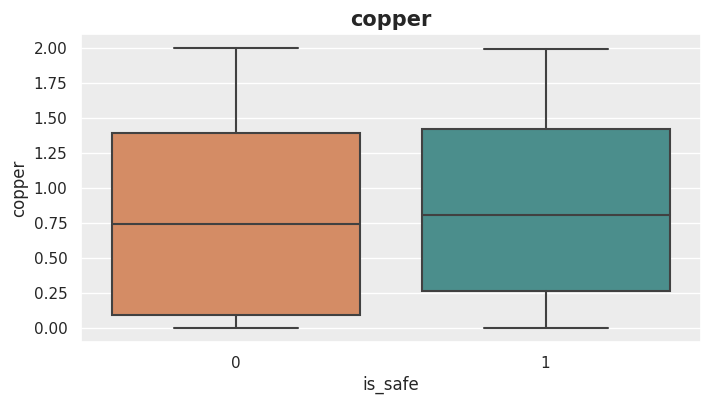

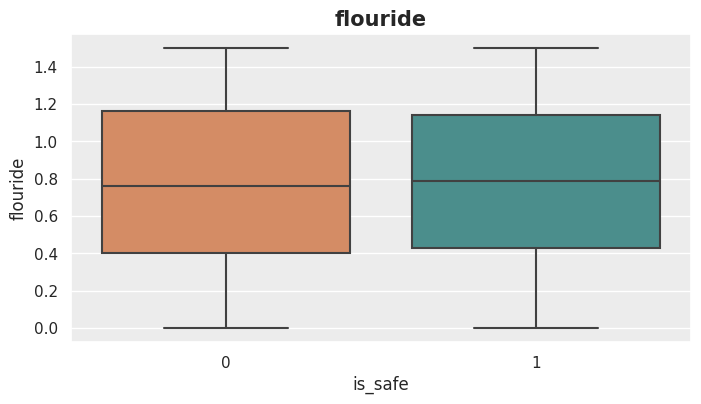

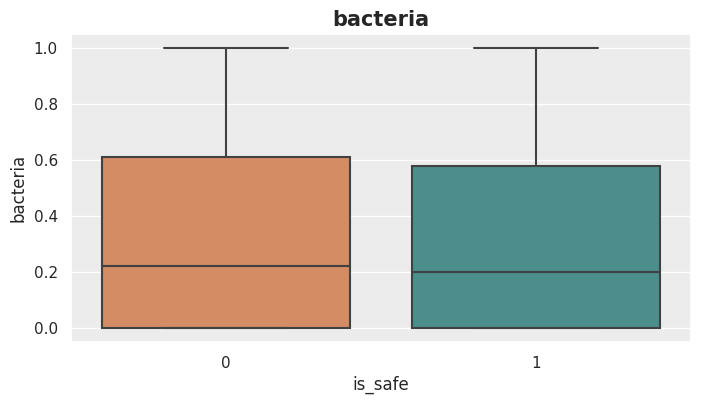

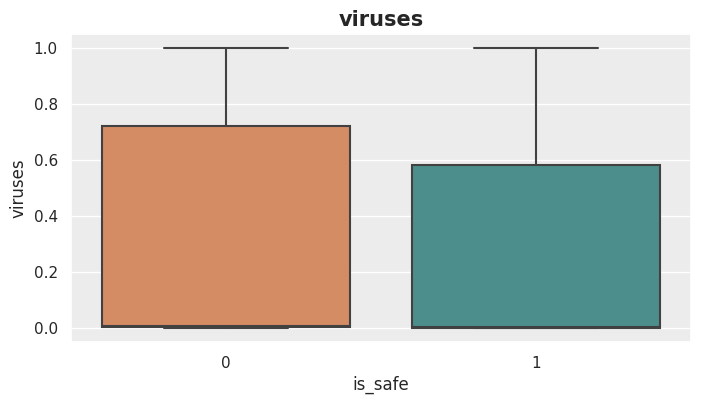

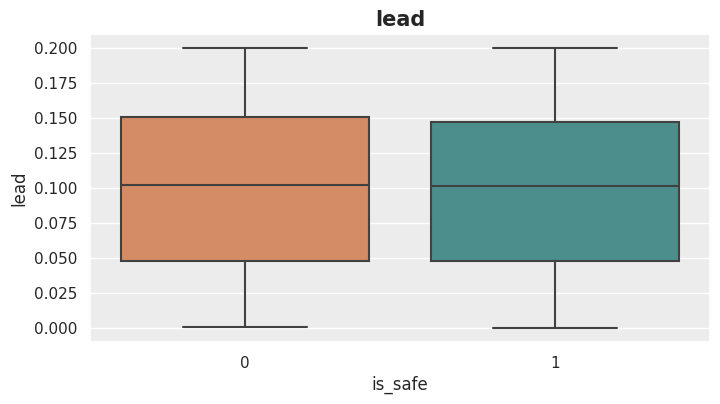

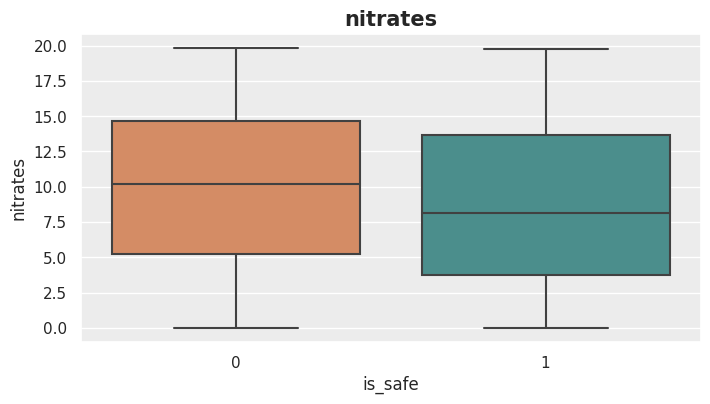

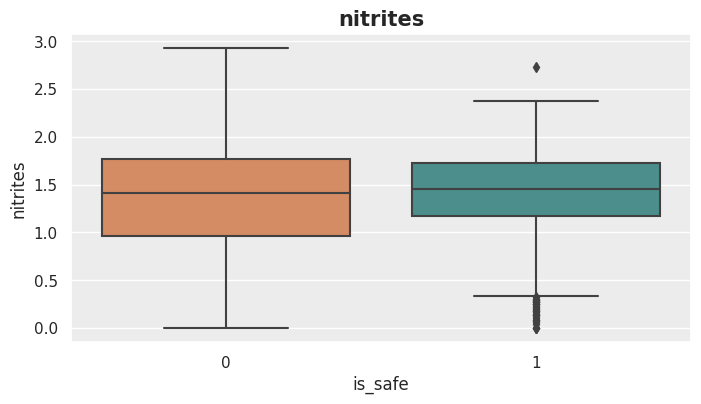

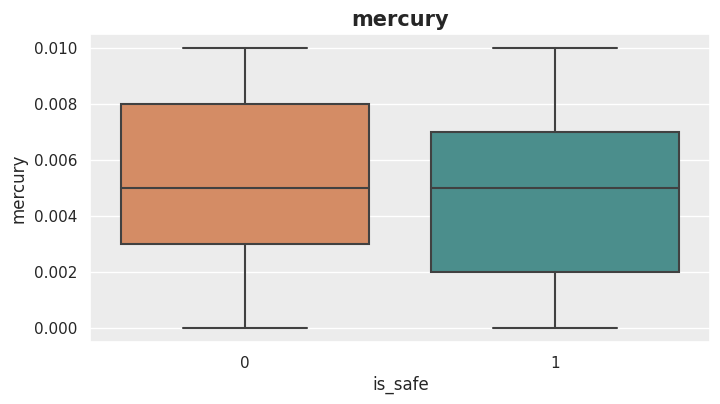

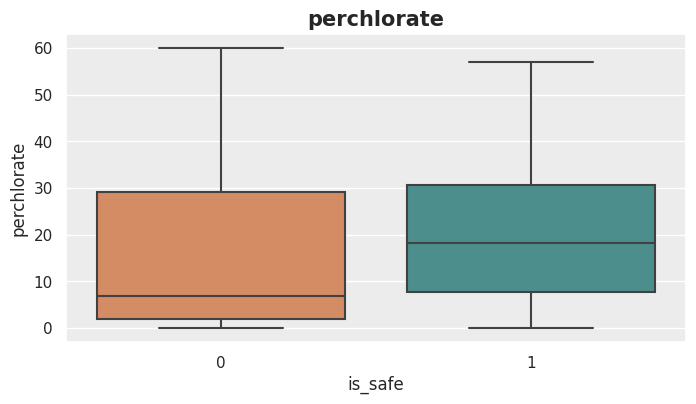

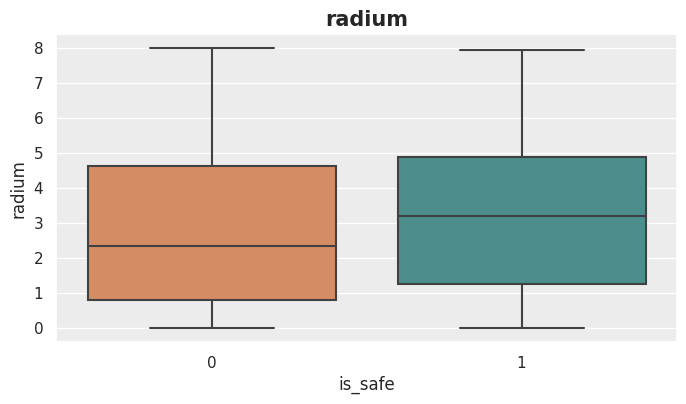

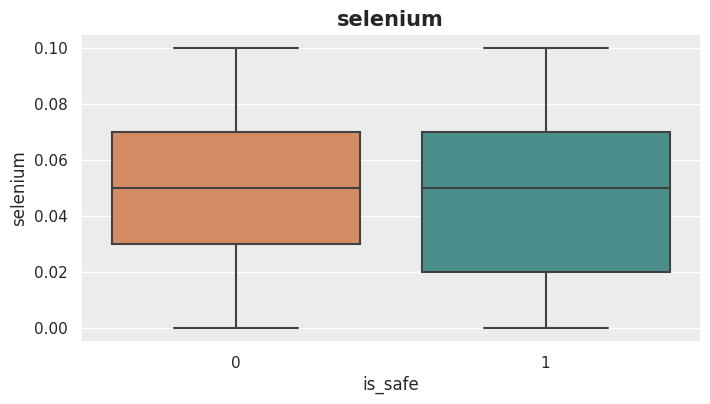

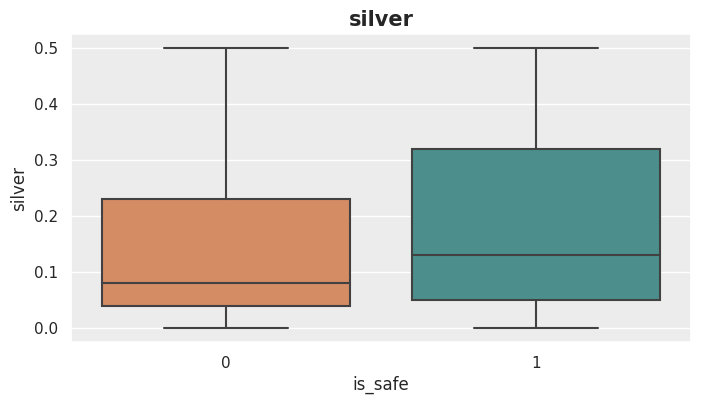

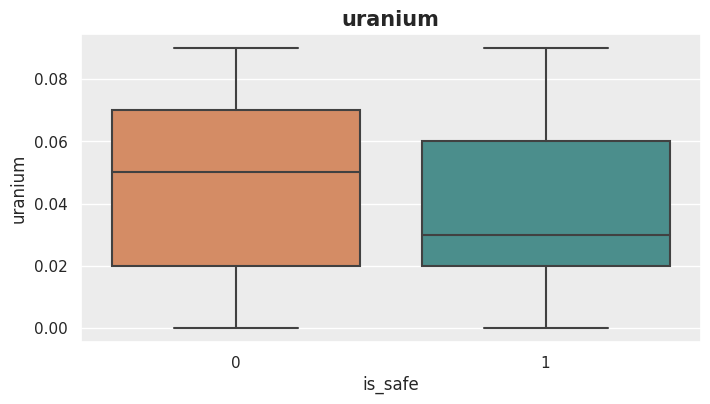

In [ ]:
#create a list of numerical features and plot them
list_of_num_features = data.loc[:, data.columns != 'is_safe']
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_num_features:
    plt.figure(figsize=(8,4))
    plt.title(feature, fontsize=15, fontweight='bold', ha='center')
    ax = sns.boxplot(x = data['is_safe'], y = list_of_num_features[feature], data = data, palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

In [ ]:
#balance the target variable
columns = data.columns
columns = [c for c in columns if c not in ['is_safe']]
y = data['is_safe'] #prior target variable
X = data[columns]  #prior features

ros = RandomOverSampler(sampling_strategy='minority')
X, y = ros.fit_resample(X, y) #y_train as balanced target variable
print(f"Imbalanced target class: {(y)}\n\nBalanced target class: {Counter(y)}\n")
print(X.shape[0] - data.shape[0], 'new random picked points')

Imbalanced target class: 0        1
1        1
2        0
3        1
4        1
        ..
14163    1
14164    1
14165    1
14166    1
14167    1
Name: is_safe, Length: 14168, dtype: int64

Balanced target class: Counter({1: 7084, 0: 7084})

6172 new random picked points


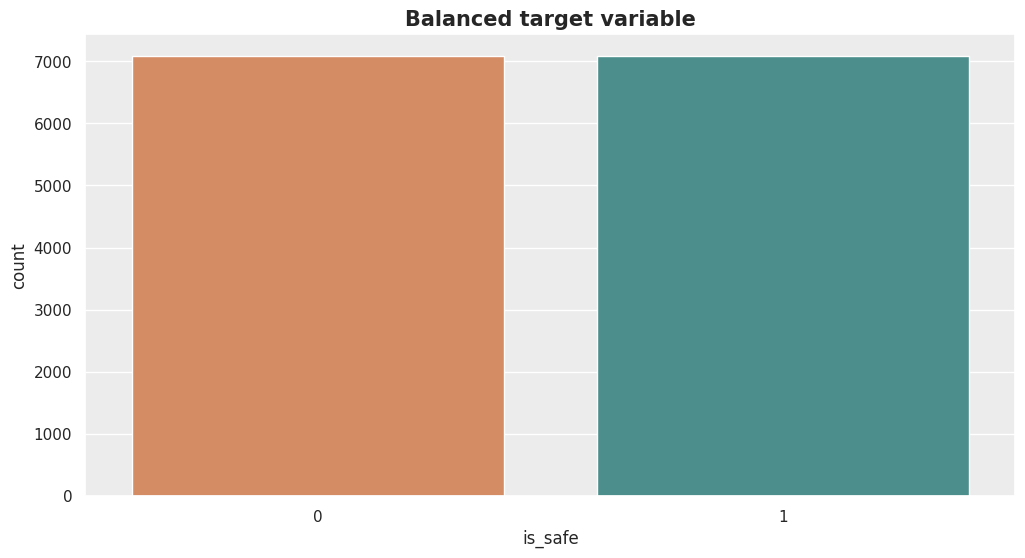

In [ ]:
#plot the balanced target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=y, data=data, palette=palette_features)
plt.show()

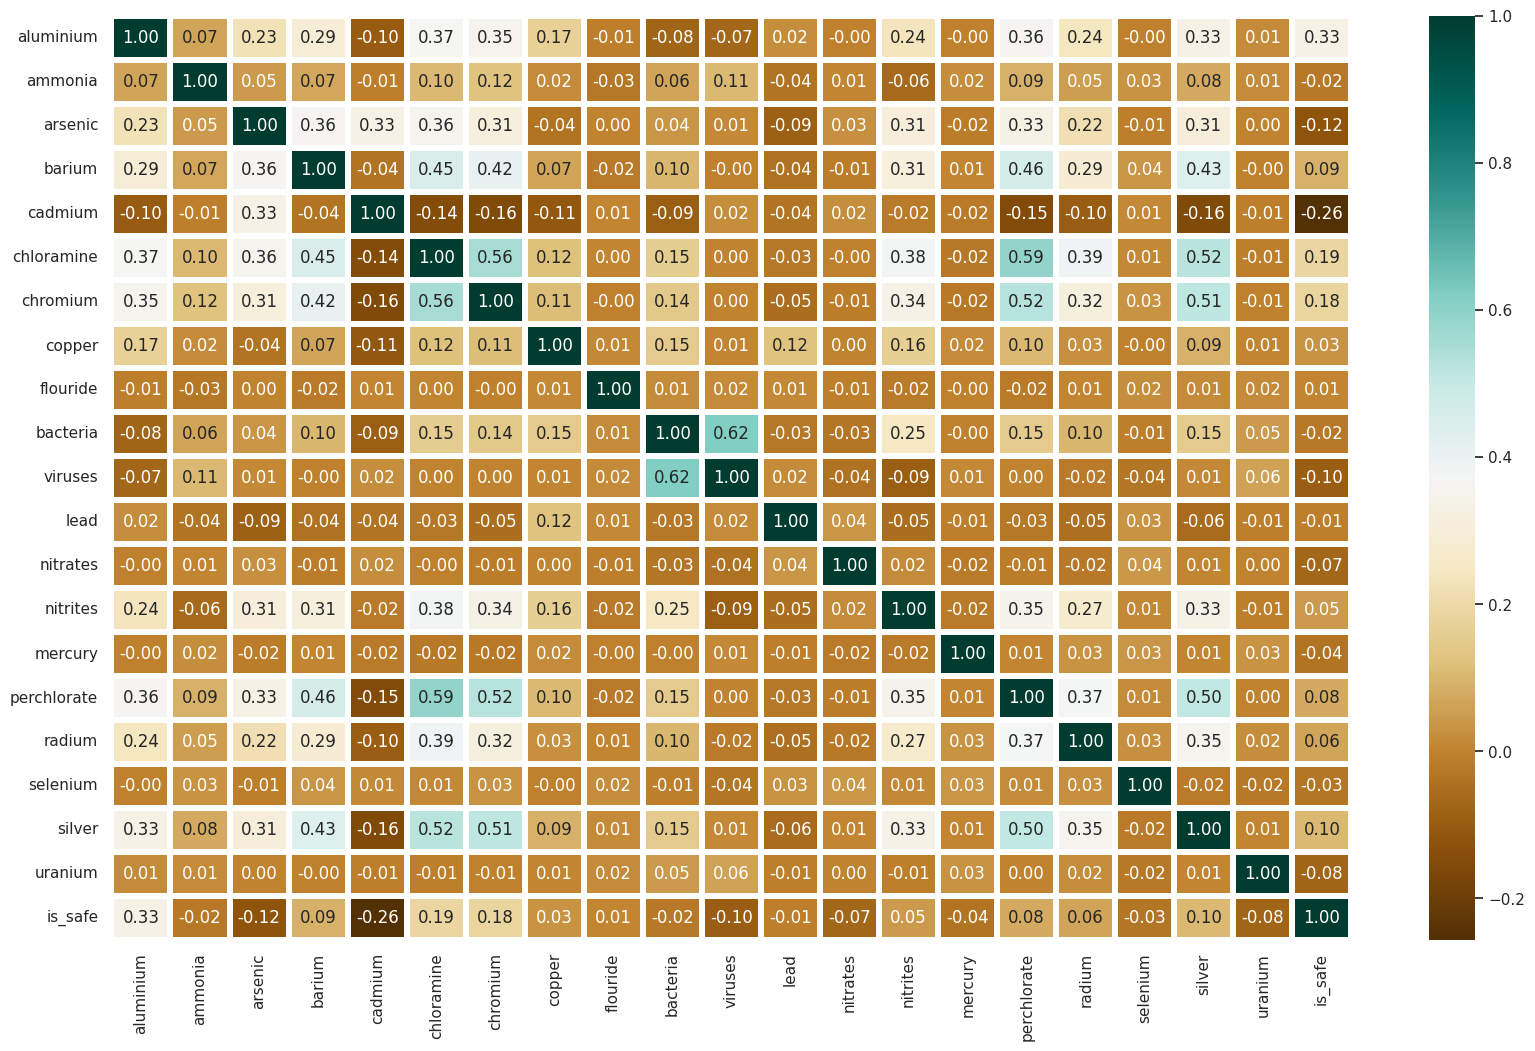

In [ ]:
# plotting correlation matrix to notice relationships or lack of it between variables
corr = data.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

In [ ]:
data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

## **Results of NBC without prepared data**

In [ ]:
#preparation of train and test data for K-NN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #70 % of train data, 30 % of test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9917, 20), (4251, 20), (9917,), (4251,))

[[1512  559]
 [  79 2101]]


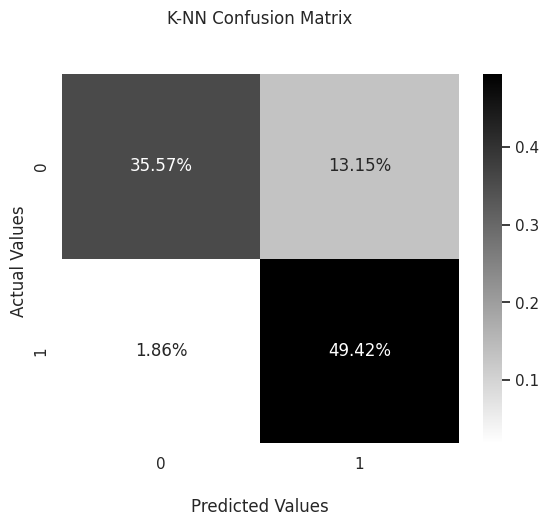

In [ ]:
#implement K-NN algorithm
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)
y_pred_knnc = knnc.predict(X_test)

#plotting Confusion Matrix
cf_matrix_knnc = confusion_matrix(y_test, y_pred_knnc)
print(cf_matrix_knnc)

ax = sns.heatmap(cf_matrix_knnc/np.sum(cf_matrix_knnc), annot=True, fmt='.2%', cmap='binary')
ax.set_title('K-NN Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

[[1564  507]
 [ 500 1680]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2071
           1       0.77      0.77      0.77      2180

    accuracy                           0.76      4251
   macro avg       0.76      0.76      0.76      4251
weighted avg       0.76      0.76      0.76      4251



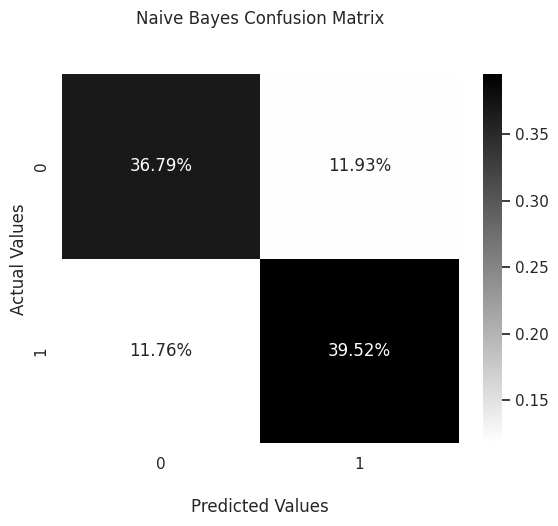

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model Naive Bayes
naive_bayes = GaussianNB()

# Melatih model dengan data pelatihan
naive_bayes.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_naive_bayes = naive_bayes.predict(X_test)

# Hitung dan cetak confusion matrix
cf_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
print(cf_matrix_naive_bayes)

# Cetak classification report
classification_rep = classification_report(y_test, y_pred_naive_bayes)
print(classification_rep)

# Plot confusion matrix dan tambahkan class labels ke grafiknya
ax = sns.heatmap(cf_matrix_naive_bayes/np.sum(cf_matrix_naive_bayes), annot=True, fmt='.2%', cmap='binary')
ax.set_title('Naive Bayes Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

# Tampilkan visualisasi Confusion Matrix
plt.show()


##**Results of K-NN implementation after preparation of data**

In [ ]:
#preparation of train and test data for ML models
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2, random_state = 1) #70 % of train data, 30 % of test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11334, 20), (2834, 20), (11334,), (2834,))

In [ ]:
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std).head())

After standardizing our features, the first 5 rows of our data now look like this:

         0         1         2         3         4         5         6   \
0 -0.502823 -0.335893  3.725183  0.367679 -0.341651  0.109777  0.078869   
1 -0.750385 -0.470046 -0.159883 -1.288447 -0.904952 -0.968764 -0.945959   
2 -0.763415 -1.572830 -0.159883 -1.149070  0.503300 -1.018839 -0.981298   
3  0.103053 -0.192645 -0.472474 -0.280014 -0.792292  0.533490 -0.733926   
4 -0.711296 -0.193782 -0.383162  1.556482 -0.876787  0.321634  0.573613   

         7         8         9         10        11        12        13  \
0 -0.448360 -0.131044 -0.091542 -0.772004 -1.236300  1.851372  0.546861   
1 -1.194591 -0.270202 -0.953971 -0.758371  0.427296 -1.360855 -1.532748   
2  1.339486  1.260533 -0.953971  1.924708 -0.623396  1.485490 -0.916567   
3  1.401672  0.054500 -0.953971 -0.774731  1.320385  1.356356  0.161748   
4 -1.085766  1.190955  1.571714  1.461168 -0.465792  0.615624  0.007703   

         14   

In [ ]:
# find best scored 10 features
select_feature = SelectKBest(f_classif, k=10).fit(X_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [2.64704266e+03 2.24261505e+01 5.09118870e+02 2.35194301e+02
 2.24091845e+03 1.06854177e+03 9.53305363e+02 1.46294018e+01
 9.74765952e-01 1.82684035e+01 3.05439415e+02 6.20476250e+00
 1.33212624e+02 8.79298003e+01 3.11833271e+01 1.88089552e+02
 1.44126088e+02 3.95883458e+01 2.58652545e+02 1.51340517e+02]
Feature list: Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object')


[[1046  344]
 [ 324 1120]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1390
           1       0.77      0.78      0.77      1444

    accuracy                           0.76      2834
   macro avg       0.76      0.76      0.76      2834
weighted avg       0.76      0.76      0.76      2834



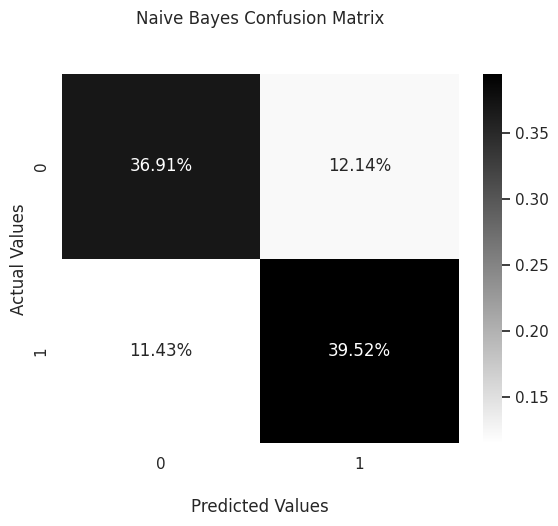

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model Naive Bayes
naive_bayes = GaussianNB()
X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)

# Melatih model dengan data pelatihan
naive_bayes.fit(X_train_2,y_train)

# Lakukan prediksi pada data uji
y_pred_naive_bayes = naive_bayes.predict(X_test_2)

# Hitung dan cetak confusion matrix
cf_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
print(cf_matrix_naive_bayes)

# Cetak classification report
classification_rep = classification_report(y_test, y_pred_naive_bayes)
print(classification_rep)

# Plot confusion matrix dan tambahkan class labels ke grafiknya
ax = sns.heatmap(cf_matrix_naive_bayes/np.sum(cf_matrix_naive_bayes), annot=True, fmt='.2%', cmap='binary')
ax.set_title('Naive Bayes Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

# Tampilkan visualisasi Confusion Matrix
plt.show()
